### 1. 调用KNN函数来实现分类
数据采用的是经典的iris数据，是三分类问题

In [10]:
# 读取相应的库
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [11]:
# 读取数据 X, y
iris = datasets.load_iris()
X = iris.data
y = iris.target
print (X, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [12]:
# 把数据分成训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

In [13]:
# 构建KNN模型， K值为3、 并做训练
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
# 计算准确率
from sklearn.metrics import accuracy_score
correct = np.count_nonzero((clf.predict(X_test)==y_test)==True)
#accuracy_score(y_test, clf.predict(X_test))
print ("Accuracy is: %.3f" %(correct/len(X_test)))

Accuracy is: 0.921


0.9210526315789473

### 2. 从零开始自己写一个KNN算法

In [1]:
from sklearn import datasets
from collections import Counter  # 为了做投票
from sklearn.model_selection import train_test_split
import numpy as np

# 导入iris数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

In [8]:
def euc_dis(instance1, instance2):
    """
    计算两个样本instance1和instance2之间的欧式距离
    instance1: 第一个样本， array型
    instance2: 第二个样本， array型
    """
    # TODO
    dist = np.sqrt(sum((instance1 - instance2)**2))
    return dist
    

def knn_classify(X, y, testInstance, k):
    """
    给定一个测试数据testInstance, 通过KNN算法来预测它的标签。 
    X: 训练数据的特征
    y: 训练数据的标签
    testInstance: 测试数据，这里假定一个测试数据 array型
    k: 选择多少个neighbors? 
    """
    # TODO  返回testInstance的预测标签 = {0,1,2}
    distances = [euc_dis(x, testInstance) for x in X]
    # argsort函数返回的是数组值从小到大的索引值
    kneighbors = np.argsort(distances)[:k]
    count = Counter(y[kneighbors])
    return count.most_common()[0][0]

In [9]:
# 预测结果。    
predictions = [knn_classify(X_train, y_train, data, 3) for data in X_test]
correct = np.count_nonzero((predictions==y_test)==True)
#accuracy_score(y_test, clf.predict(X_test))
print ("Accuracy is: %.3f" %(correct/len(X_test)))

Accuracy is: 0.921


### 3. KNN的决策边界

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.neighbors import KNeighborsClassifier

# 生成一些随机样本
n_points = 100
X1 = np.random.multivariate_normal([1,50], [[1,0],[0,10]], n_points)
X2 = np.random.multivariate_normal([2,50], [[1,0],[0,10]], n_points)
X = np.concatenate([X1,X2])
y = np.array([0]*n_points + [1]*n_points)
print(X.shape, y.shape)

(200, 2) (200,)


In [18]:
# KNN模型的训练过程
clfs = []
neighbors = [1,3,5,9,11,13,15,17,19]
for i in range(len(neighbors)):
    clfs.append(KNeighborsClassifier(n_neighbors=neighbors[i]).fit(X,y))

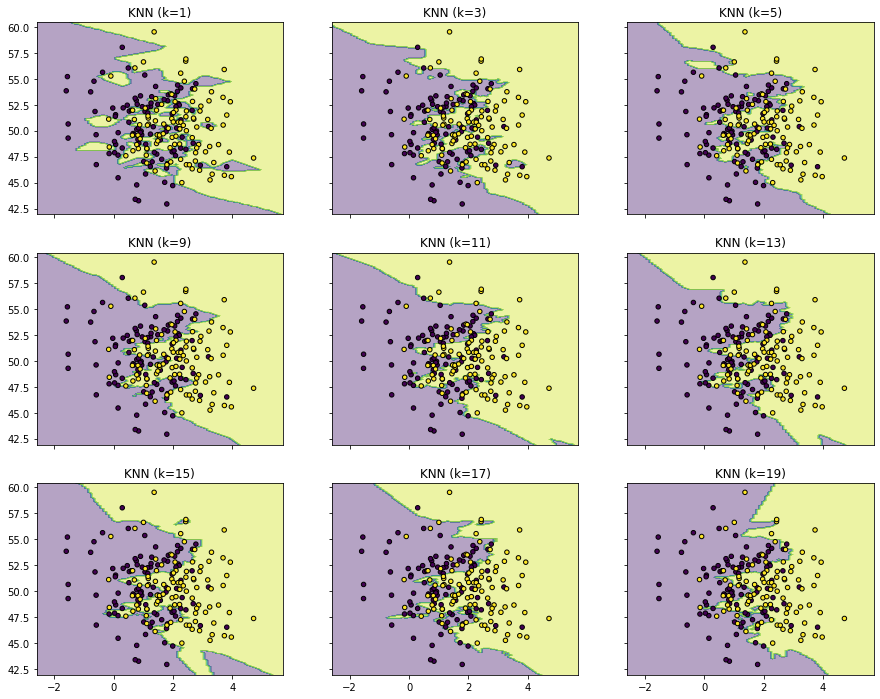

In [25]:
# 可视化结果
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3,3, sharex='col', sharey='row', figsize=(15, 12))
# product([0, 1, 2], [0, 1, 2])图片位置
for idx, clf, tt in zip(product([0, 1, 2], [0, 1, 2]),
                        clfs,
                        ['KNN (k=%d)'%k for k in neighbors]):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html#numpy.meshgrid
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    # https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)    
plt.show()

In [21]:
for i in product([0, 1, 2], [0, 1, 2]):
    print(i)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)
